# Data download

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import missingno as msno

In [2]:
df= pd.read_csv('data/raw/raw_merged.csv', sep=';')
df.set_index('date', drop=True, inplace=True)
df.set_index(pd.to_datetime(df.index), inplace=True)
df.head()

,Gold,CrudeOil,S&P500,FTSE250
date,,,,
1986-01-02,326.30,25.56,209.59,1417.26
1986-01-03,326.75,26.00,210.88,1424.61
1986-01-06,328.00,26.53,210.65,1430.96
1986-01-07,330.00,25.85,213.80,1421.22
1986-01-08,332.60,25.87,207.97,1408.79


#### Korekta ujemnej ceny kontraktów na ropę. Przyjąć cenę z dnia roboczego wcześniej (ceny kontraktów spadły poniżej 0 w dniu 20-04-2020)

In [3]:
display(df[df.CrudeOil<0])

df['CrudeOil'] = df.CrudeOil.apply(lambda x : x if x >= 0 else np.NaN)

display(df[df.index == '2020-04-20'])

df.interpolate(method='pad', inplace=True)

display(df[df.index > '2020-04-10'])

,Gold,CrudeOil,S&P500,FTSE250
date,,,,
2020-04-20,1686.2,-36.98,2823.16,15822.73


,Gold,CrudeOil,S&P500,FTSE250
date,,,,
2020-04-20,1686.2,NaN,2823.16,15822.73


,Gold,CrudeOil,S&P500,FTSE250
date,,,,
2020-04-14,1741.90,20.15,2846.06,16082.57
2020-04-15,1718.65,19.96,2783.36,15347.56
2020-04-16,1729.50,19.82,2799.55,15378.57
2020-04-17,1692.55,18.31,2874.56,15859.29
2020-04-20,1686.20,18.31,2823.16,15822.73
...,...,...,...,...
2022-12-30,1813.75,80.16,3839.50,18853.00
2023-01-03,1843.25,76.87,3824.14,19134.34
2023-01-04,1857.30,72.82,3852.97,19391.07


In [4]:
dfpc = df.copy()
dfpc = dfpc.pct_change().dropna()
dfpc.head()

,Gold,CrudeOil,S&P500,FTSE250
date,,,,
1986-01-03,0.001379,0.017214,0.006155,0.005186
1986-01-06,0.003826,0.020385,-0.001091,0.004457
1986-01-07,0.006098,-0.025631,0.014954,-0.006807
1986-01-08,0.007879,0.000774,-0.027268,-0.008746
1986-01-09,0.002706,0.006185,-0.008944,-0.013941


In [5]:
# dfpc.to_csv('data/data_returns_clean.csv', sep=';')
# df.to_csv('data/data_nominal_clean.csv', sep=';')

<AxesSubplot:>

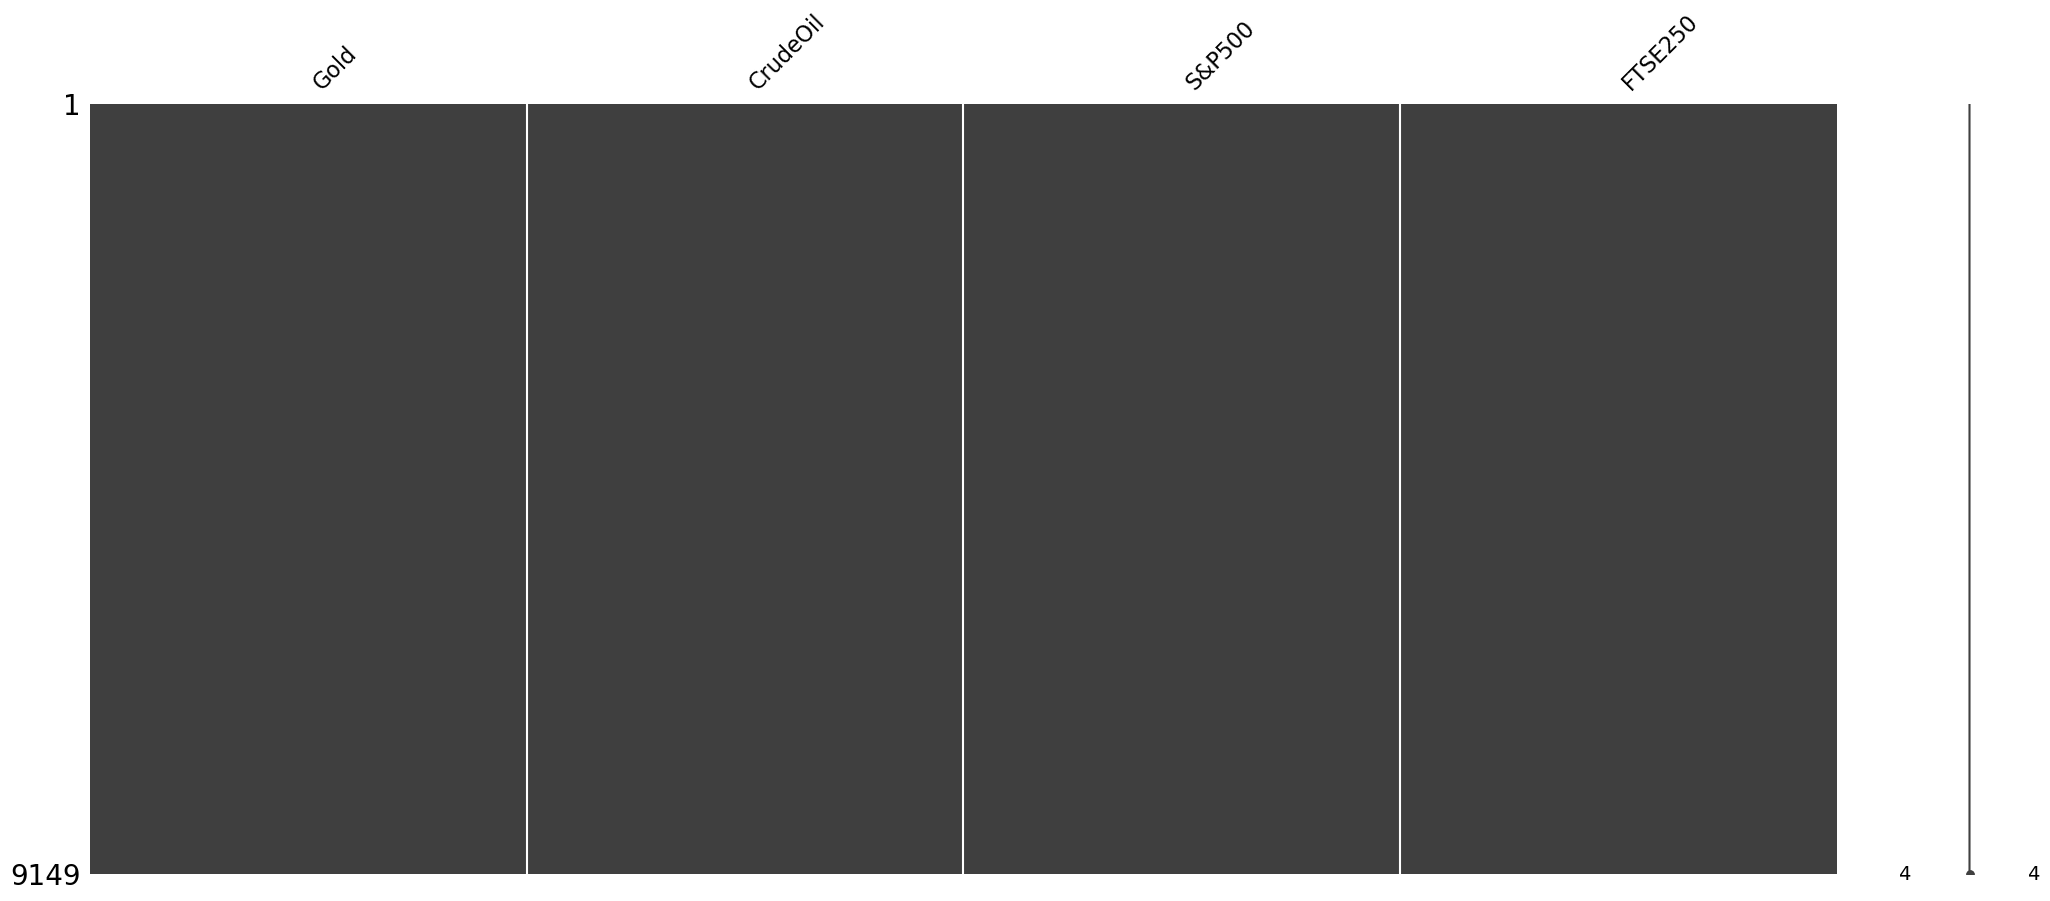

In [6]:
msno.matrix(df)

In [7]:
#df = df.dropna()
display(df.head())
df.tail()

,Gold,CrudeOil,S&P500,FTSE250
date,,,,
1986-01-02,326.30,25.56,209.59,1417.26
1986-01-03,326.75,26.00,210.88,1424.61
1986-01-06,328.00,26.53,210.65,1430.96
1986-01-07,330.00,25.85,213.80,1421.22
1986-01-08,332.60,25.87,207.97,1408.79


,Gold,CrudeOil,S&P500,FTSE250
date,,,,
2022-12-30,1813.75,80.16,3839.50,18853.00
2023-01-03,1843.25,76.87,3824.14,19134.34
2023-01-04,1857.30,72.82,3852.97,19391.07
2023-01-05,1834.00,73.61,3808.10,19463.43
2023-01-06,1852.20,73.77,3895.08,19504.72


---
# PRICE AND RETURNS PLOTS
---

Text(0.5, 1.0, 'FTSE250 price 1986-01-02 to 2023-01-06')

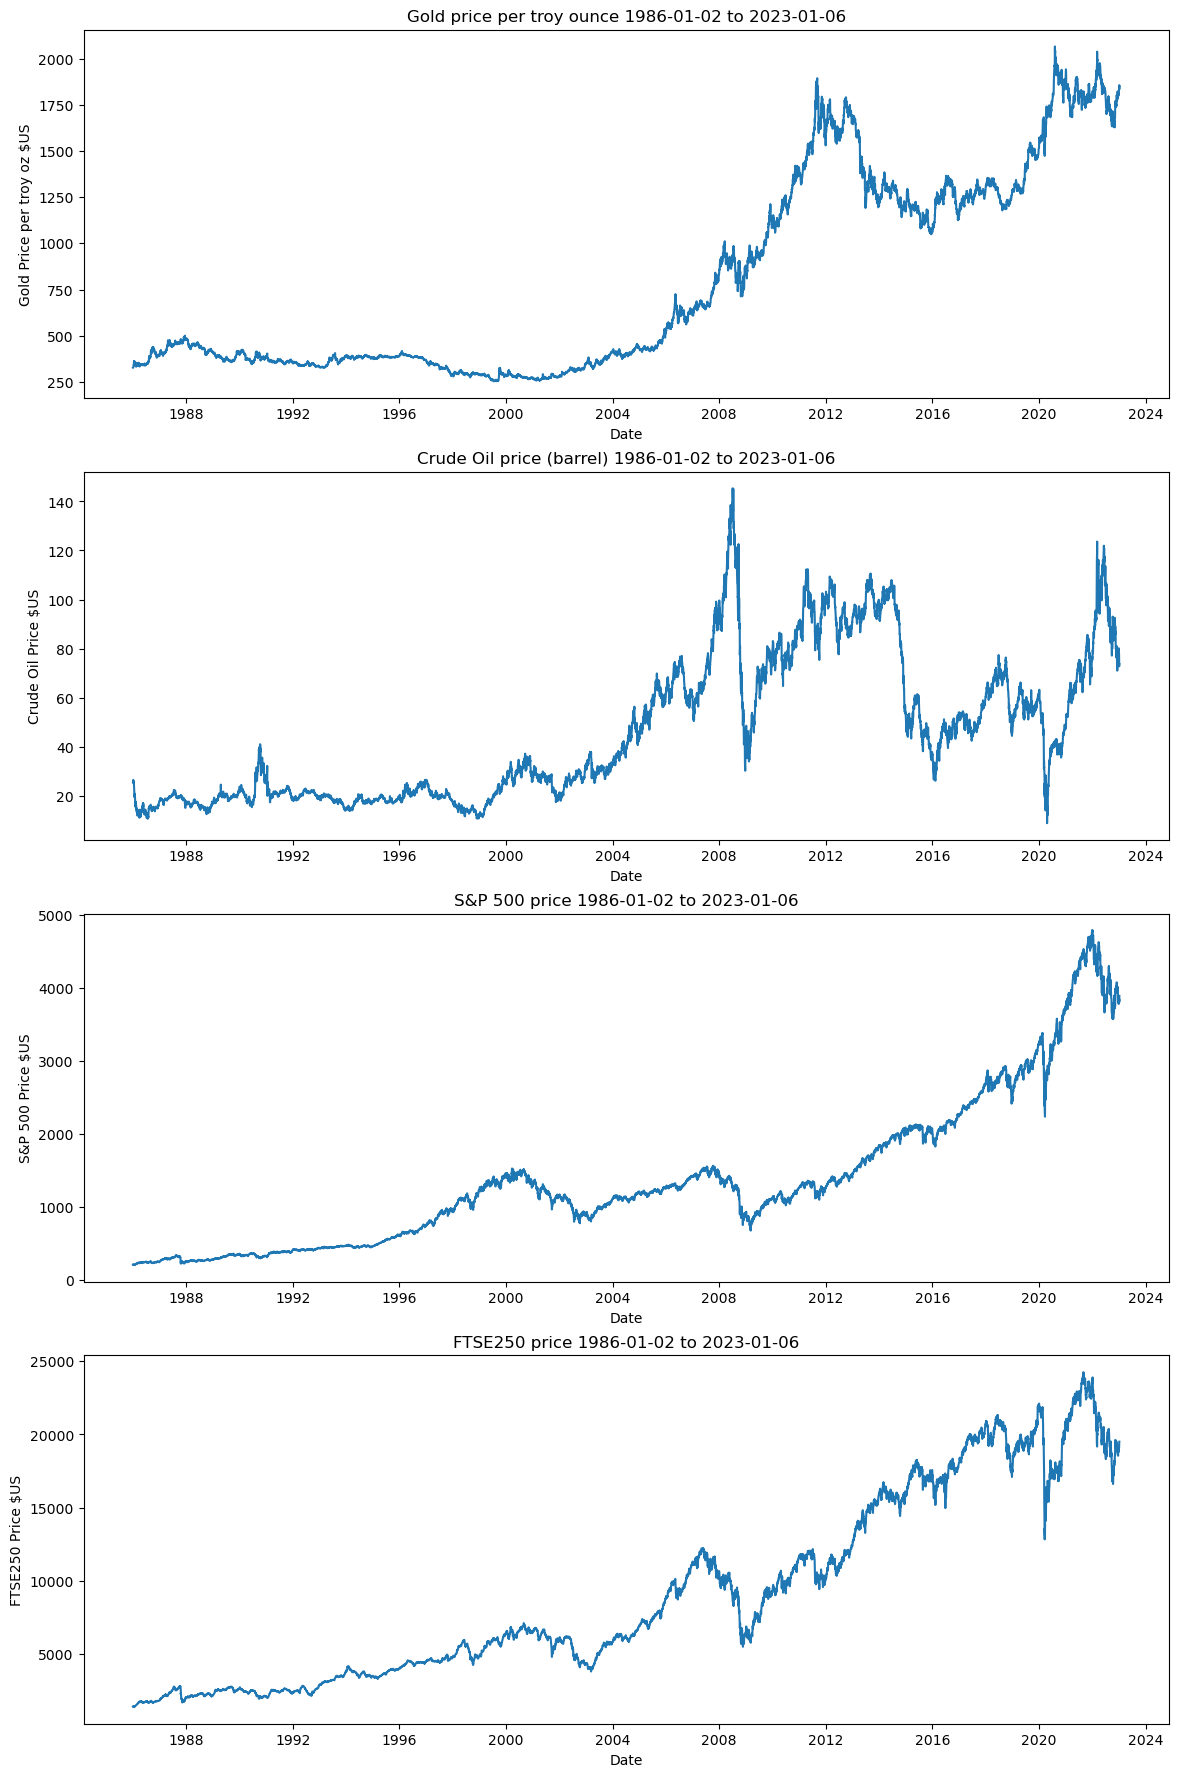

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(14,22))

# gold
sns.lineplot(x=df.index, y='Gold', data=df, ax=ax1)
ax1.set_ylabel('Gold Price per troy oz $US')
ax1.set_xlabel('Date')
ax1.set_title('Gold price per troy ounce 1986-01-02 to 2023-01-06')

# oil
sns.lineplot(x=df.index, y='CrudeOil', data=df, ax=ax2)
ax2.set_ylabel('Crude Oil Price $US')
ax2.set_xlabel('Date')
ax2.set_title('Crude Oil price (barrel) 1986-01-02 to 2023-01-06')

# sp
sns.lineplot(x=df.index, y='S&P500', data=df, ax=ax3)
ax3.set_ylabel('S&P 500 Price $US')
ax3.set_xlabel('Date')
ax3.set_title('S&P 500 price 1986-01-02 to 2023-01-06')

#ftse
sns.lineplot(x=df.index, y='FTSE250', data=df, ax=ax4)
ax4.set_ylabel('FTSE250 Price $US')
ax4.set_xlabel('Date')
ax4.set_title('FTSE250 price 1986-01-02 to 2023-01-06')

Text(0.5, 1.0, 'FTSE250 returns 1986-01-02 to 2023-01-06')

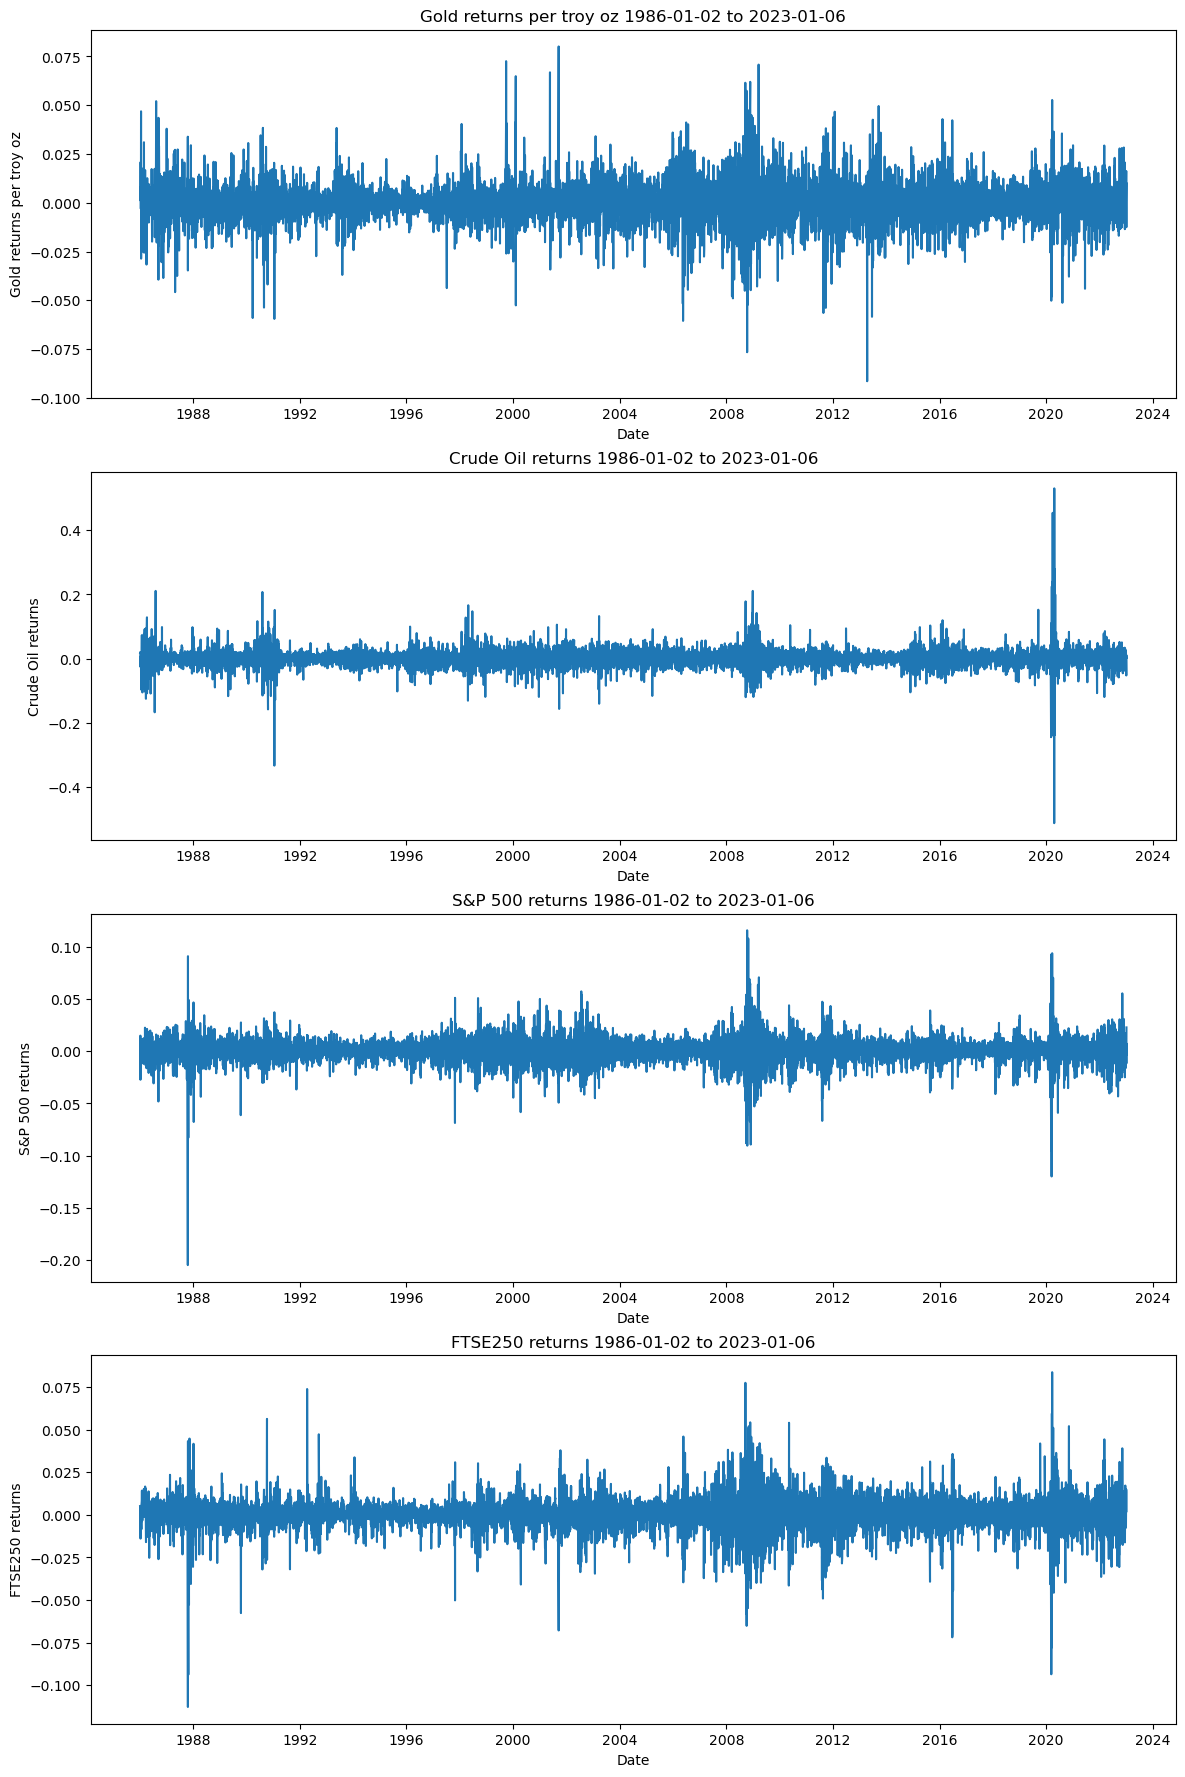

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(14,22))

# gold
sns.lineplot(x=dfpc.index, y='Gold', data=dfpc, ax=ax1)
ax1.set_ylabel('Gold returns per troy oz')
ax1.set_xlabel('Date')
ax1.set_title('Gold returns per troy oz 1986-01-02 to 2023-01-06')

# oil
sns.lineplot(x=dfpc.index, y='CrudeOil', data=dfpc, ax=ax2)
ax2.set_ylabel('Crude Oil returns')
ax2.set_xlabel('Date')
ax2.set_title('Crude Oil returns 1986-01-02 to 2023-01-06')

# sp
sns.lineplot(x=dfpc.index, y='S&P500', data=dfpc, ax=ax3)
ax3.set_ylabel('S&P 500 returns')
ax3.set_xlabel('Date')
ax3.set_title('S&P 500 returns 1986-01-02 to 2023-01-06')

#ftse
sns.lineplot(x=dfpc.index, y='FTSE250', data=dfpc, ax=ax4)
ax4.set_ylabel('FTSE250 returns')
ax4.set_xlabel('Date')
ax4.set_title('FTSE250 returns 1986-01-02 to 2023-01-06')

---
# STATISTICS

</br>

## 1. Correlation

              Gold  CrudeOil    S&P500   FTSE250
Gold      1.000000  0.743332  0.792009  0.870773
CrudeOil  0.743332  1.000000  0.527173  0.646688
S&P500    0.792009  0.527173  1.000000  0.931175
FTSE250   0.870773  0.646688  0.931175  1.000000


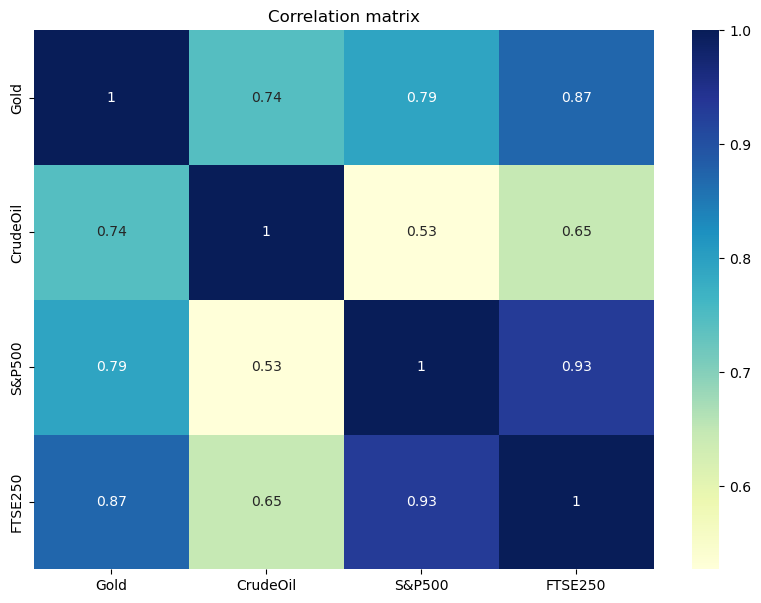

In [11]:
print(df.corr())
  
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr('pearson'), cmap="YlGnBu", annot=True) 
plt.title('Correlation matrix')
plt.show()

In [12]:
import scipy 

def get_significance(pvalue):
    '''
    Helper function to make p-value visual with use of stars
    '''
    if pvalue > 0.1: return ''
    elif pvalue > 0.05: return '*'
    elif pvalue> 0.01: return '**'
    else: return '***'

dfc = pd.DataFrame()
feat1s = []
feat2s = []
corrs = []
p_values = []

for feat1 in df.columns:
    for feat2 in df.columns:
        if feat1 != feat2:
            feat1s.append(feat1)
            feat2s.append(feat2)
            corr, p_value = scipy.stats.pearsonr(df[feat1], df[feat2])
            corrs.append(corr)
            p_values.append(p_value)

dfc['Feature_1'] = feat1s
dfc['Feature_2'] = feat2s
dfc['Correlation'] = corrs
dfc['p_value'] = p_values
dfc['p_value'] = dfc['p_value'].map(get_significance)
#dfc.to_csv('data/p_vals.csv', sep=';')

dfc

,Feature_1,Feature_2,Correlation,p_value
0,Gold,CrudeOil,0.743332,***
1,Gold,S&P500,0.792009,***
2,Gold,FTSE250,0.870773,***
3,CrudeOil,Gold,0.743332,***
4,CrudeOil,S&P500,0.527173,***
5,CrudeOil,FTSE250,0.646688,***
6,S&P500,Gold,0.792009,***
7,S&P500,CrudeOil,0.527173,***
8,S&P500,FTSE250,0.931175,***
9,FTSE250,Gold,0.870773,***


## Descriptive

In [13]:
dfdesc_price = df.describe()
#dfdesc_price.to_excel('data/data_descriptive_price.xlsx', engine='openpyxl')

dfdesc_ret = dfpc.describe()
#dfdesc_ret.to_excel('data/data_descriptive_returns.xlsx', engine='openpyxl')
dfdesc_ret

,Gold,CrudeOil,S&P500,FTSE250
count,9148.000000,9148.000000,9148.000000,9148.000000
mean,0.000240,0.000515,0.000389,0.000336
std,0.010012,0.028101,0.011771,0.009870
min,-0.091501,-0.513381,-0.204669,-0.112737
25%,-0.004456,-0.012118,-0.004514,-0.003918
50%,0.000147,0.000669,0.000656,0.000856
75%,0.005015,0.013273,0.005810,0.005037
max,0.080110,0.530864,0.115800,0.083707


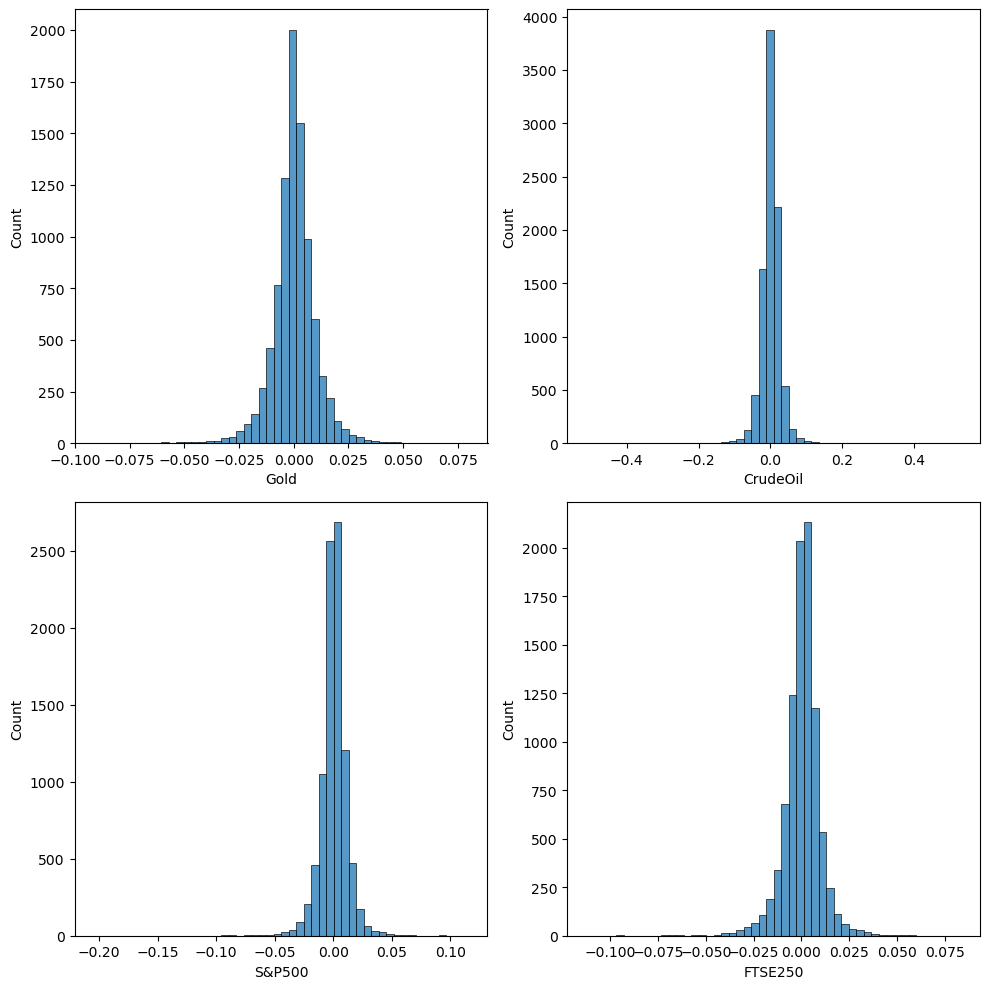

In [14]:
cols = dfpc.columns

# Plot histograms in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for i, col in enumerate(cols):
    sns.histplot(dfpc[col], ax=axs[i], bins=50)

# Label the subplots and adjust the layout
plt.tight_layout()

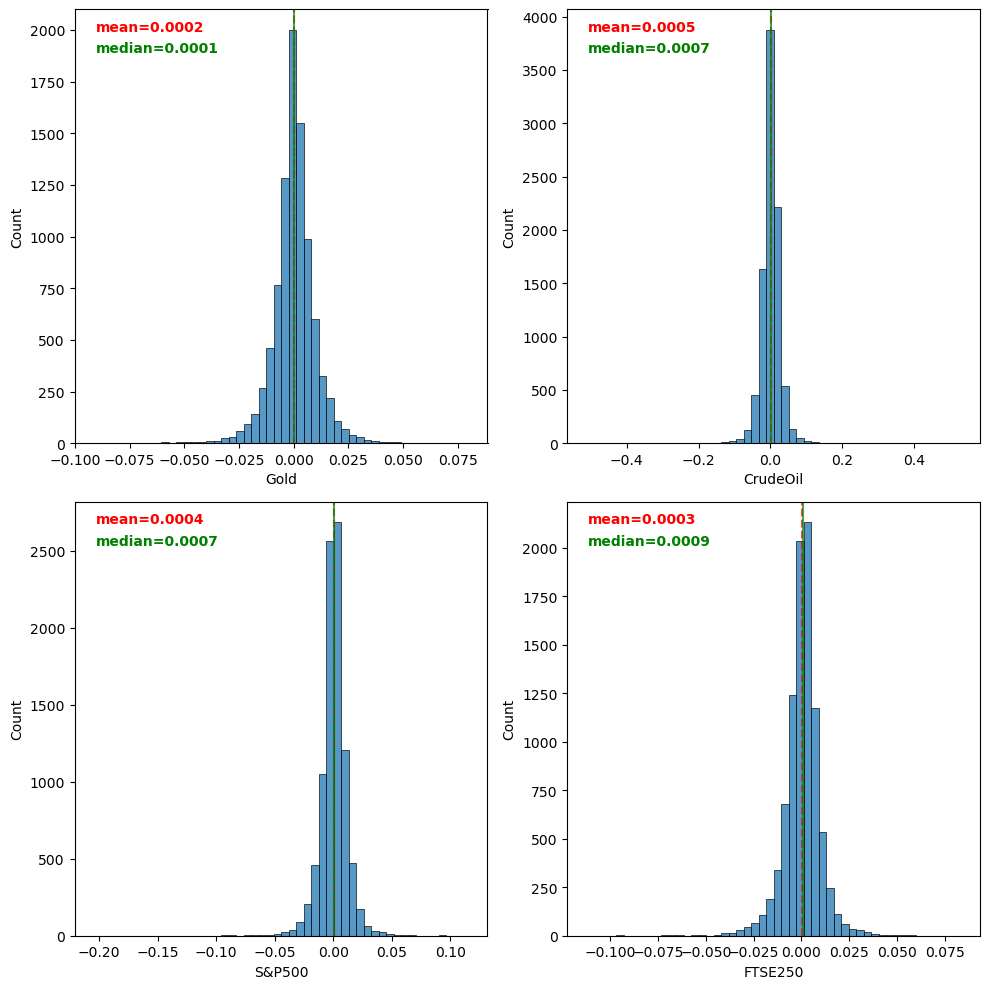

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for ax, col in zip(axs, dfpc.columns):
    sns.histplot(dfpc[col], ax=ax, bins=50)
    mean = dfpc[col].mean()
    median = dfpc[col].median()
    ax.axvline(mean, color='red', linestyle='--', alpha=0.7)
    ax.axvline(median, color='green', linestyle='-', alpha=0.7)
    ax.text(0.05, 0.95, f'mean={mean:.4f}', color='red', transform=ax.transAxes, fontweight='bold')
    ax.text(0.05, 0.90, f'median={median:.4f}', color='green', transform=ax.transAxes, fontweight='bold')

plt.tight_layout()
plt.show()

seasonal decompose has problems with that data bc we dont have weekends, it would need a custom calendar for resampling like one below

In [16]:
# from pandas_market_calendars import get_calendar

# # get the custom calendar for NYSE
# nyse = get_calendar('NYSE')

# # set frequency to daily and use custom calendar
# df = df.resample('B', closed='right', label='right', base=0, convention='start').last().dropna()

In [17]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import statsmodels.api as sm

# #df = df.asfreq('D')

# fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# # Flatten the subplot array
# ax = ax.flatten()

# # Loop through each column of the dataframe
# for i, col in enumerate(df.columns):
#     # Get the seasonal decomposition of the time series
#     res = sm.tsa.seasonal_decompose(df[col], model='multiplicative')
#     # Plot the decomposition on the subplot
#     res.plot(ax=ax[i])

# # Show the plot
# plt.show()

The autocorrelation measures the similarity between a time series and a lagged version of itself. A high autocorrelation at a particular lag indicates that there is a strong correlation between the time series and its lagged version at that lag. In other words, the value of the time series at a given point in time is likely to be similar to its value at a previous point in time, separated by the lag. The autocorrelation plot helps to identify any patterns or seasonality in the time series data.

Autocorrelation plots for time series data with seasonality and without seasonality will have different characteristics.

In time series data with seasonality, the autocorrelation plot will show strong correlations at regular, fixed intervals (lags) that correspond to the length of the seasonality. For example, if the data has daily seasonality, the autocorrelation plot may show strong correlations at lags of 7, 14, 21, etc. (corresponding to a week).

In contrast, in time series data without seasonality, the autocorrelation plot may show weak correlations or no correlations at any lag. The plot may appear as a flat line with values close to zero.

In practice, time series data often has both seasonality and other patterns, such as trend and random noise, so the autocorrelation plot may show strong correlations at some lags (corresponding to the seasonality) and weak or no correlations at other lags. The autocorrelation plot is useful in identifying the presence of seasonality in the data and determining the appropriate lag for modeling the data.

The code is using the statsmodels library to calculate and plot the autocorrelation of multiple time series data. The acf function from the statsmodels.tsa.stattools module is used to compute the autocorrelation.

The input for the acf function is the time series data and the maximum number of lags to consider when calculating the autocorrelation. The resulting output is an array of autocorrelation values for each lag.

In the code, a for loop is used to go through each time series and calculate its autocorrelation using the acf function. Then, a line plot is created for each time series and added to the same plot with the ax.plot method. The legend is added using the ax.legend method to specify the labels for each time series.

The code is generating a line plot of the autocorrelation values over time lags, where the time lags are on the x-axis and the autocorrelation values are on the y-axis. By comparing the autocorrelation values across different lags and time series, you can get an idea of the strength and pattern of the relationship between the time series and its past values.

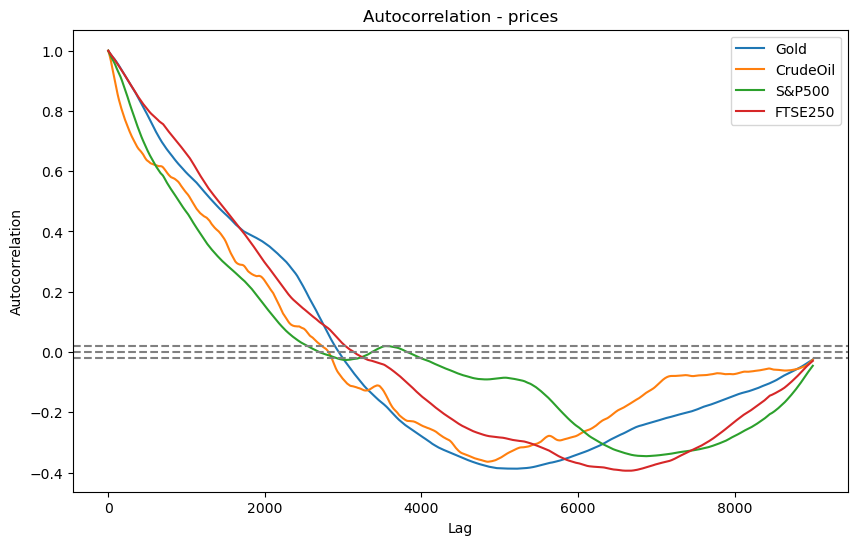

In [20]:
import statsmodels.tsa.stattools as stattools

# Plot the autocorrelation for each time series
plt.figure(figsize=(10, 6))
for col in df.columns:
    autocorrelation = stattools.acf(df[col], nlags=9000)
    plt.plot(autocorrelation, label=col)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.title('Autocorrelation - prices')
plt.show()

In this code, the list comprehension calculates the partial autocorrelation between each time series and its lagged version for the specified number of lags. The partial autocorrelation is calculated as the correlation coefficient between each time series and its lagged version, with the np.corrcoef function. The calculated partial autocorrelation values are stored in a dictionary pacfs where the keys are the variable names and the values are lists of partial autocorrelation values. Finally, the plot function from matplotlib is used to plot the partial autocorrelation values for each variable on the same plot, with the variable names displayed as a legend.

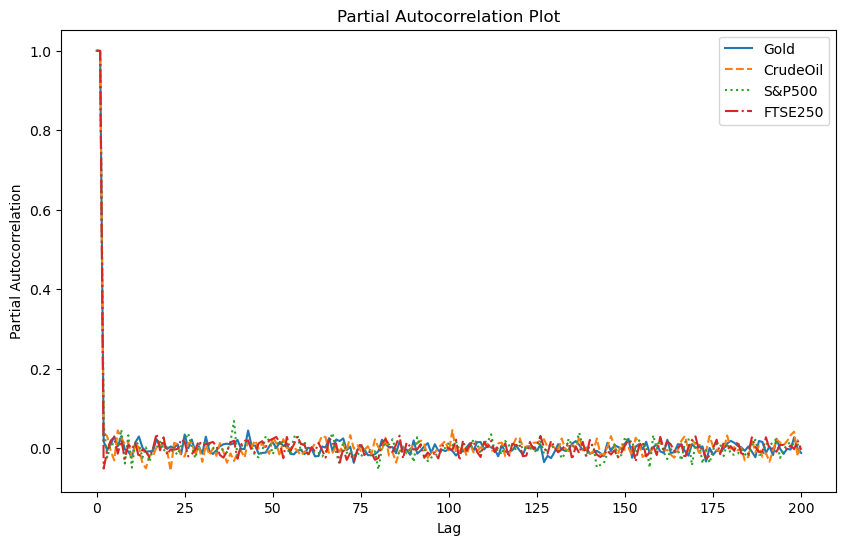

In [19]:
import statsmodels.api as sm

# create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# specify line styles for each time series
line_styles = ['-', '--', ':', '-.']

# loop through each time series column
for i, col in enumerate(df.columns):
    # extract the time series data
    ts = df[col]
    
    # calculate the partial autocorrelation for the time series
    pacf = sm.tsa.stattools.pacf(ts, nlags=200)
    
    # plot the partial autocorrelation
    ax.plot(pacf, line_styles[i % len(line_styles)], label=col)
    
# add a legend to the plot
ax.legend()

# add labels and title to the plot
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('Partial Autocorrelation Plot')

# show the plot
plt.show()